# Naive Bayes

### Naive Bayes Tutorial Part 1: Predicting survival from titanic crash

##### Koşullu olasılık
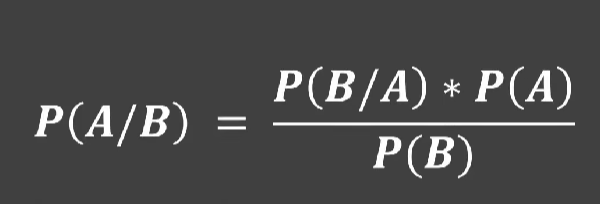

Ör:
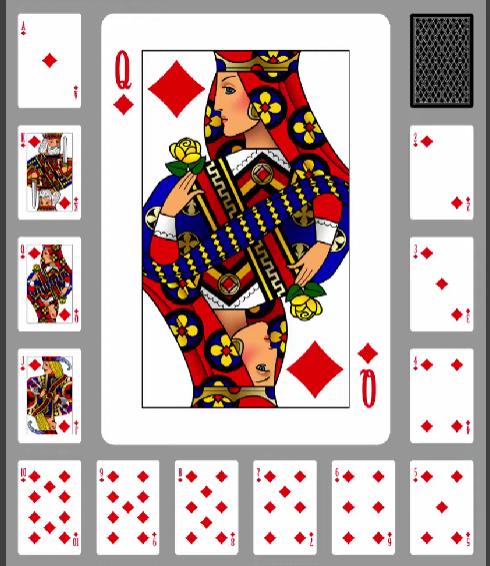

13 kart var ve bunlardan 1 tanesi queen, 
Burada koşul seçilen kartın queen olup olmaması.

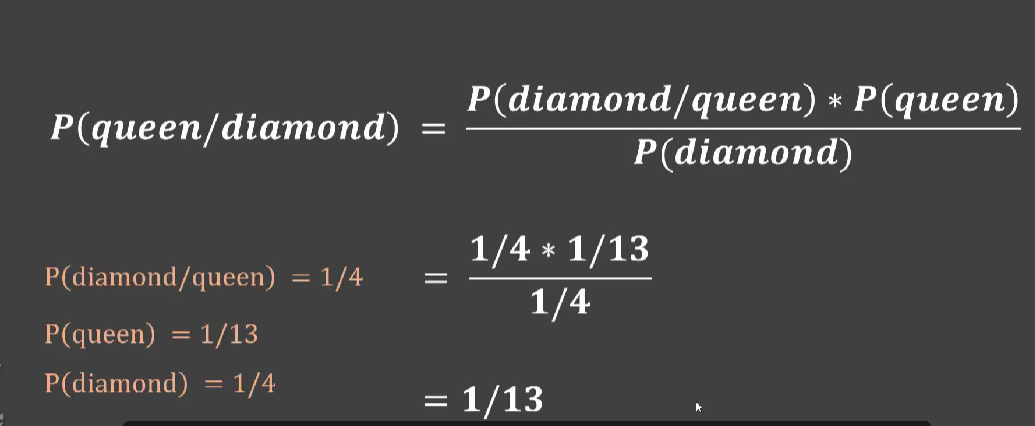

Bunu Titanic verileri üzerinde kullanacağız. 
Elimizde olan veriler üzerinde yapacağımız değerlendirme aşağıdaki özelliklere göre olacak.
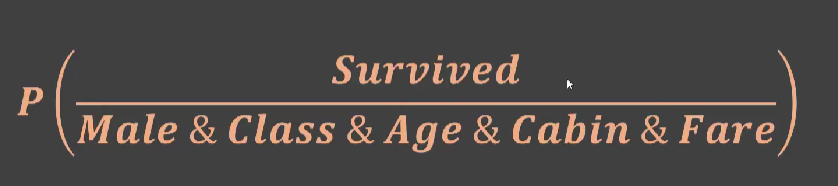


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Decision-Tree-exercise-Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis="columns", inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [6]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [7]:
inputs=pd.concat([inputs,dummies],axis='columns')

In [24]:
inputs=inputs.drop(["Sex","male"], axis="columns")

In [25]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [19]:
from math import *

In [20]:
inputs.Age= inputs.Age.fillna(floor(inputs.Age.mean()))

In [26]:
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [40]:
model.fit(X_train,y_train)

GaussianNB()

In [59]:
model.score(X_test,y_test)

0.8044692737430168

In [58]:
model.predict_proba(X_test[:10])

array([[0.96956357, 0.03043643],
       [0.00602706, 0.99397294],
       [0.77471925, 0.22528075],
       [0.93920123, 0.06079877],
       [0.78401168, 0.21598832],
       [0.94826522, 0.05173478],
       [0.93329219, 0.06670781],
       [0.92511054, 0.07488946],
       [0.23496475, 0.76503525],
       [0.96643753, 0.03356247]])

In [56]:
X_test[0:10]

,Pclass,Age,Fare,female
531,3,29.0,7.2292,0
759,1,33.0,86.5000,1
449,1,52.0,30.5000,0
795,2,39.0,13.0000,0
512,1,36.0,26.2875,0
348,3,3.0,15.9000,0
883,2,28.0,10.5000,0
672,2,70.0,10.5000,0
600,2,24.0,27.0000,1
478,3,22.0,7.5208,0


In [57]:
y_test[0:10]

531    0
759    1
449    1
795    0
512    1
348    1
883    0
672    0
600    1
478    0
Name: Survived, dtype: int64

In [60]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(GaussianNB(),X_train, y_train, cv=10)

In [37]:
import numpy as np

In [61]:
np.average(scores)

0.7667840375586854